# Load graph edgelist and create a graph

In [ ]:
import spartan as st

In [ ]:
# rich graph tuples
tensor_data = st.loadTensor(path = "./inputData/yelp.tensor.gz", header=None, 
                            dtype={0:int, 1:int, 2:str, 3:int, 4:int} )

In [ ]:
# generate sparse tensor
stensor = tensor_data.toSTensor(hasvalue=True, mappers={2:st.TimeMapper(timeformat='%Y-%m-%d')})

In [ ]:
# create bipartite graph
graph = st.Graph(stensor, bipartite=True, weighted=True, modet=2)

In [ ]:
edgelist = graph.get_edgelist_array()

## Degree of user and msg

In [ ]:
# count degree
rdegrees, cdegrees = graph.degrees()

In [ ]:
# degree distributions
uniqued, fod = graph.degree_dist(axis=1)
# draw user degree dist
figuser = st.plot_dist(uniqued, fod, 'user degree', 'freq')
figuser.show()

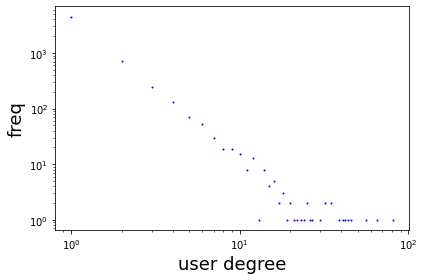

In [ ]:
# msg degree dist
uniqued, fod = graph.degree_dist(axis=0)
# draw the dist
figmsg = st.plot_dist(uniqued, fod, 'user degree', 'freq')
figuser.show()

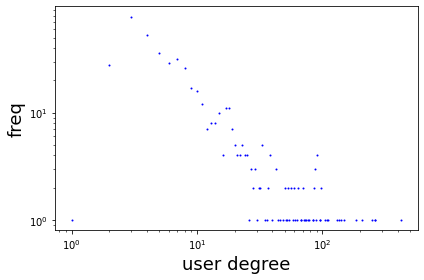